In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


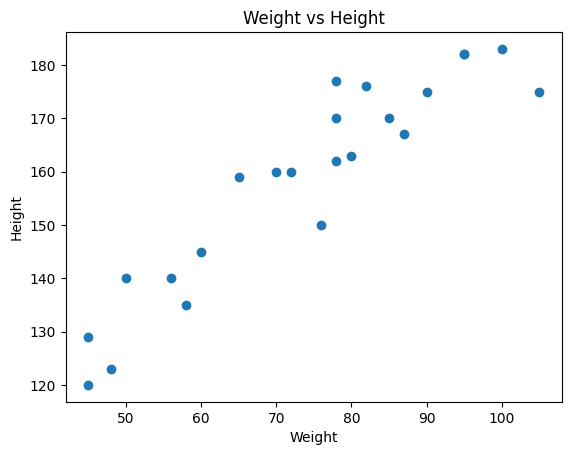

In [6]:
plt.scatter(df.Weight,df.Height)
plt.ylabel('Height')
plt.xlabel('Weight')
plt.title('Weight vs Height')
plt.show()

In [ ]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


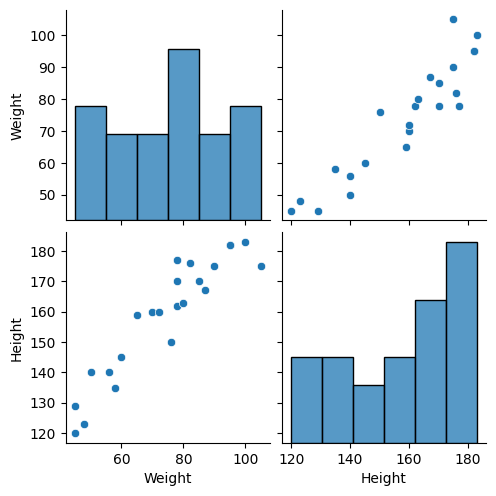

In [8]:
## seaborn library for visualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
## Independent and dependent features
X=df[['Weight']] ## independent feature should be in 2D or dataframe
y=df['Height'] ## dependent feature can be in 1D array or series
X.shape, y.shape

((23, 1), (23,))

In [14]:
X_series=df['Weight']
X_series.shape

(23,)

In [18]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [19]:
## standardization
## Zscore formula = (x-mean)/std
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) ## we use transform here because we have to use the same mean and std which we used in training data, 
## if we use fit_transform then it will calculate new mean and std for test data which is not correct this is called data leakage. 

In [24]:
## apply simple linear regression
from sklearn.linear_model import LinearRegression
regression_model=LinearRegression(n_jobs=-1)

In [25]:
regression_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [29]:
print("coefficient or slope :" ,regression_model.coef_)
print("intercept :", regression_model.intercept_)

coefficient or slope : [17.2982057]
intercept : 156.47058823529412


##### coeff  or slope here is 17.29 , which show us 1 unit movement in weight value that lead us to 17.29 unit movement into height value. 
##### Intercept : 156.47 , when wight value is zero, at which point your line hitting the y axis. which is 156.47

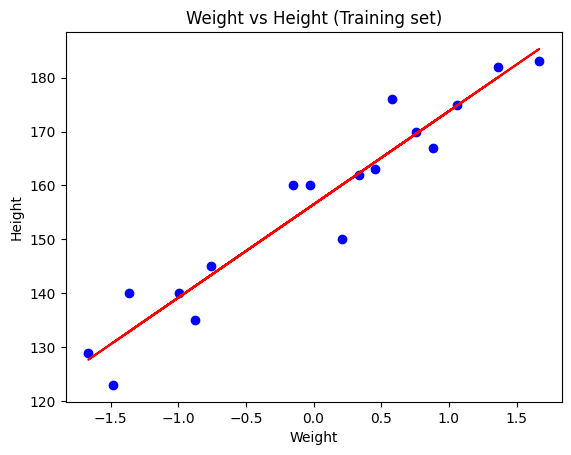

In [31]:
## plot  training data with respect to best fit line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regression_model.predict(X_train), color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height (Training set)')
plt.show()

### y_pred_test = 156.47 + 17.29(X_test)

In [32]:
## predict on test data
y_pred=regression_model.predict(X_test)

In [ ]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred) ### r2 score is also called coefficient of determination
print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("R2 score :", r2) ### R2 score is between 0 to 1, 1 means perfect prediction, 0 means worst prediction

MAE : 9.66512588679501
MSE : 114.84069295228699
RMSE : 10.716374991212605
R2 score : 0.7360826717981276


In [35]:
## adjusted r2 score
n=len(y_test)
p=X_test.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2 score :", adjusted_r2)

Adjusted R2 score : 0.6701033397476595


In [36]:
## OLS method (Ordinary Least Squares)
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train) ## adding a constant column to the independent features
ols_model=sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.15e-09
Time:                        20:27:34   Log-Likelihood:                -51.726
No. Observations:                  17   AIC:                             107.5
Df Residuals:                      15   BIC:                             109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.4706      1.310    119.477      0.0

/Users/niteshranjansingh/AutoPipelineAI/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [38]:
## prediction on new data
new_data=[[70],[75],[80]]
new_data=scaler.transform(new_data)
new_pred=regression_model.predict(new_data)
new_pred

/Users/niteshranjansingh/AutoPipelineAI/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([153.88159699, 159.12122213, 164.36084726])